## Dataset - The 20 newsgroups text dataset

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets.The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other.
Here are the groups:
1. comp.graphics
2. comp.os.ms-windows.misc
3. comp.sys.ibm.pc.hardware
4. comp.sys.mac.hardware
5. comp.windows.x	
6. rec.autos
7. rec.motorcycles
8. rec.sport.baseball
9. rec.sport.hockey	
10. sci.crypt
11. sci.electronics
12. sci.med
13. sci.space
14. misc.forsale	
15. talk.politics.misc
16. talk.politics.guns
17. talk.politics.mideast	
18. talk.religion.misc
19. alt.atheism
20. soc.religion.christian

The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [3]:
import warnings
warnings.filterwarnings('ignore')

As you can see the dataset from scikit learn has 11314 text files and there are 20 topics in total

In [4]:
dataset.filenames.shape

(11314,)

In [5]:

set(dataset.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [6]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [10]:
document = pd.DataFrame()
document["Document"] = documents
document['Topic Number'] = dataset.target
document = pd.merge(document,topic_names,left_on="Topic Number",right_on="index",how="left",sort=False)[["Document","Topic Number","Topic Name"]]

In [11]:
document.head()

,Document,Topic Number,Topic Name
0,Well i'm not sure about the story nad it did s...,17,talk.politics.mideast
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",0,alt.atheism
2,Although I realize that principle is not one o...,17,talk.politics.mideast
3,Notwithstanding all the legitimate fuss about ...,11,sci.crypt
4,"Well, I will have to change the scoring on my ...",10,rec.sport.hockey


## Preprocessing Text

This involves removing punctuation,stop words and if the data is in html format we can do more things like removing html,css,script content using BeautifulSoup. For the 20 newsgroups dataset scikit learn provides a remove argument which can be used to clean the text such as removing headers,footers and quotes.

When evaluating text classifiers on the 20 Newsgroups data, you should strip newsgroup-related metadata. In scikit-learn, you can do this by setting remove=('headers', 'footers', 'quotes') which we did in the previous step when importing the data.

## Vectorization

In order to feed predictive or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis.This is called as a document term matrix. This can be done in two ways.
1. Using TFIDF Vectorizer
2. Count Vectorizer + Calculating Rates on top of this instead of just counts.

(Using rates rather than counts will allow us to account for differences in the length of the novels. Accounting for differences in document lengths when dealing with word counts is essential. For example, a text using “whence” ten times in a 1,000 word article uses the word at a rate of 10 per 1,000 words, while a 100,000 word novel that uses “whence” 20 times uses it at a rate of 0.2 per 1,000 words. While the word occurs more in absolute terms in the second text, the rate is higher in the first text. While there are other ways to account for document length—a procedure called “normalization”—considering the rate per 1,000 words will serve us well. An appealing feature of word rates per 1,000 words is that readers are familiar with documents of this length (e.g., a newspaper article).)

### 1. TFIDF Vectorizer

In [50]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [52]:
vectors = tfidf_vectorizer.fit_transform(documents)

In [53]:
vectors.shape

(11314, 39115)

In [54]:
# This shows the number of words in our vocabulary set
vocab = np.array(tfidf_vectorizer.get_feature_names())
vocab.shape

(39115,)

### 2.Count Vectorizer + Rates(Per 50 Words)

In [12]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')

In [14]:
tf = tf_vectorizer.fit_transform(documents)

In [15]:
tf.shape

(11314, 39115)

In [16]:
# This shows the number of words in our vocabulary set
vocab = np.array(tf_vectorizer.get_feature_names())
vocab.shape

(39115,)

In [17]:
tf

<11314x39115 sparse matrix of type '<class 'numpy.int64'>'
	with 693602 stored elements in Compressed Sparse Row format>

#### Why does Count Vectorizer return a Sparse Matrix and what is a Sparse Matrix?

A sparse matrix only records non-zero entries and is used to store matrices that contain a significant number of entries that are zero. To understand why this matters enough that CountVectorizer returns a sparse matrix by default, consider a 4000 by 50000 matrix of word frequencies that is 60% zeros. In Python an integer takes up four bytes, so using a sparse matrix saves almost 500M of memory, which is a considerable amount of computer memory in the 2010s.

In [30]:
# convert this to a normal numpy array
dtm = tf.toarray()
# normalize counts to rates per 50 words
rates = 50 * dtm / np.sum(dtm, axis=1, keepdims=True)

In [31]:
dtm.shape

(11314, 39115)

In [32]:
rates.shape

(11314, 39115)

In [33]:
# In order to find how many times the word "media" appeared in the first document
media_idx = list(vocab).index('media')
dtm[0,media_idx]

4

In [34]:
# This fills the missing values with zero
rates[np.isnan(rates)] = 0

## First Method: Euclidean Distance

reference: https://de.dariah.eu/tatom/working_with_text.html#working-with-text

The Euclidean distance between two vectors in the plane should be familiar from geometry, as it is the length of the hypotenuse that joins the two vectors. For instance, consider the Euclidean distance between the vectors x→=(1,3) and y→=(4,2). The distance between the two vectors is √(1−4)2+(3−2)2=√10.
This two dimension thing can be extended to an arbitrary number of dimensions.Since two documents in our corpus now have an expression as vectors, we can calculate the Euclidean distance between them.

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(tf)

np.round(dist,1)

array([[  0. ,  11.9,  11.9, ...,   9.4,  11.2,  14.4],
       [ 11.9,   0. ,  11.7, ...,   8.4,  10.6,  13.7],
       [ 11.9,  11.7,   0. , ...,   9.1,  11.1,  14.2],
       ..., 
       [  9.4,   8.4,   9.1, ...,   0. ,   7.7,  11.9],
       [ 11.2,  10.6,  11.1, ...,   7.7,   0. ,  13. ],
       [ 14.4,  13.7,  14.2, ...,  11.9,  13. ,   0. ]])

In [55]:
# the distance between the first and third document can be calculated as 

dist[1,3]

11.575836902790225

In [56]:
# the distance between the third and fifth document can be calculated as 
dist[3,5]

9.5916630466254382

Which shows the third and fifth documents have more similarity as compared to the first and third documents.

## Second Method: Cosine Similarity

If we want to use a measure of distance that takes into consideration the length of the novels, we could use cosine similarity.This uses the judgement of orientation for similarity between two vector spaces.Two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

dist = cosine_similarity(tf)

In [58]:
dist[1,3]

0.029061909685954821

In [59]:
dist[3,5]

0.025993762245501817

### Visualizing Distances

It is often desirable to visualize the pairwise distances between our texts. A general approach to visualizing distances is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, “multidimensional scaling” (MDS) and family of functions in scikit-learn. however it is hard to use this visualization when having many documents.

Here we only visualize the first ten documents using their target topics which are already given

In [60]:
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity = "precomputed",random_state = 1)
pos = mds.fit_transform(dist[0:10,0:10])

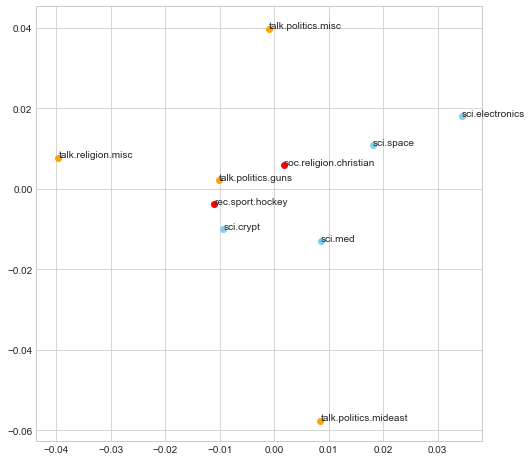

In [71]:
xs, ys = pos[:, 0], pos[:, 1]
# Short version of filenames
plt.figure(figsize=(8,8))
names = dataset.target_names[10:]
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "talk" in name else 'skyblue' if "sci" in name else "red"
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)
plt.show()

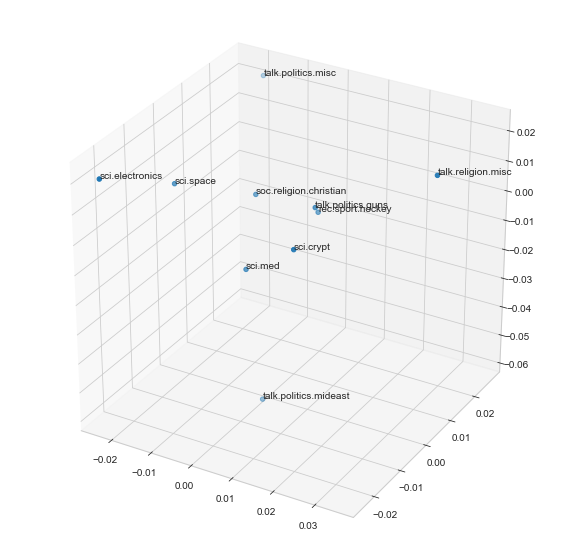

In [72]:
## Three Dimensions
from mpl_toolkits.mplot3d import Axes3D

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist[0:10,0:10])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)
    
plt.show()

## Third Method: LDA (Latent Dirichlet Allocation) Using CountVectorizer+Rates

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
# Train the LDA Model with the documents. Here we need to give the number of topics to cluster on as this is unsupervised learning.
no_topics = 20
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [20]:
def store_topics(model, feature_names, no_top_words):
    """This function is to create a dictionary with the number 
    of topics and the corresponding top words."""
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic", topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        topics[topic_idx]=" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topics

In [21]:
topics = store_topics(lda,vocab,20)

Topic 0
picture sleeve australia dg ph plplot 61 stones promo farid au graders 805 dh measuring strain rsi posture department rolling
Topic 1
cipher ciphers van da en het substitution ve cryptologia een fips bu ld ermeni unicity ghostscript parse system7 schematic osmanli
Topic 2
stephanopoulos package fonts vat kk dee dole stimulus truetype tt reuss tomb labor embargo xmosaic senate arens magi _____________________________________________________________________ atm
Topic 3
vs gm lib insurance st symbol undefined libxmu hawks john xmu rochester ahl com1 moncton baltimore providence cape springfield com3
Topic 4
205 fax columbia 212 nick ingr 202 b30 phone cluster uucp ca com corp dtmedin catbyte internet 703 dave british
Topic 5
00 10 25 15 14 11 16 12 20 18 13 edu 17 24 21 30 40 23 19 55
Topic 6
cx w7 uw t7 mv chz hz lk ck w1 ah c_ 17 a7 k8 sk s1 bh 7u mw
Topic 7
gun guns control firearms weapons crime wire cable amendment weapon militia power defense state second wiring police const

In [22]:
# Run this step to get the corresponding topic proportions for each document
doc_topic = lda.transform(tf)

### The Below shows the the first document and the corresponding topic with the most proportion as can be seen in the bar chart.

In [23]:
topic_most_pr = doc_topic[0].argmax()
print (documents[0])
print ("--------------------------------")
print (topic_most_pr)
print ("--------------------------------")
print (topics[topic_most_pr])

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.

--------------------------------
18
--------------------------------
armenian israel armenians jews turkish war israeli people 000 russian turkey k

In [24]:
dataset.target[0]

17

In [25]:
dataset.target_names[17]

'talk.politics.mideast'

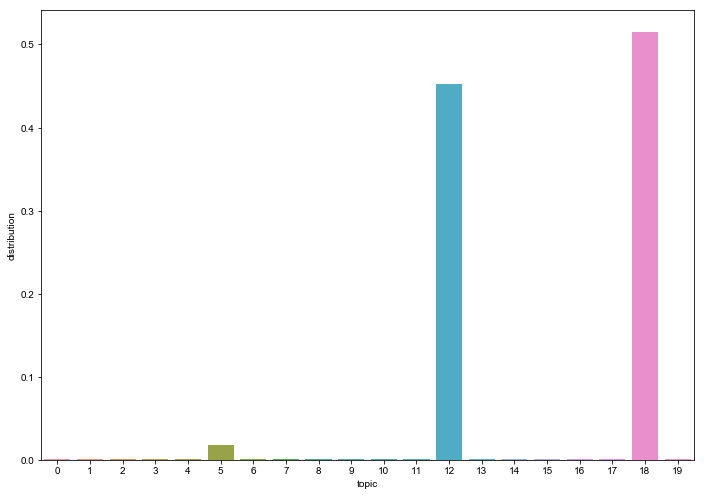

In [26]:
import pandas as pd
distributions = pd.DataFrame(doc_topic[0],columns=["distribution"])
distributions['topic'] = distributions.index 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.set_style("whitegrid")
ax = sns.barplot(x="topic",y="distribution", data=distributions)

### Visualizing this using PyLDAvis

The topics can be visualized using a package called "PyLDAvis" which shows the words associated with each topic and the proportion of words as opposed to all the topics and how much each topic overlaps.

In [27]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [28]:
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/Users/a70286/anaconda/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
12     34.638376        1       1 -0.267460  0.160066
19     25.945494        1       2 -0.245296  0.101432
8       9.364167        1       3 -0.042653 -0.391131
15      8.588981        1       4 -0.287955  0.079111
18      4.541391        1       5 -0.184916  0.020068
5       4.282337        1       6 -0.068610 -0.187553
6       2.974488        1       7  0.056721 -0.260958
9       2.944592        1       8 -0.116645 -0.026324
7       1.898394        1       9 -0.064333 -0.003906
14      1.375578        1      10 -0.000649 -0.064830
17      0.892450        1      11  0.056395 -0.003969
4       0.547684        1      12  0.122734  0.028658
13      0.467607        1      13  0.107214  0.038514
10      0.324557        1      14  0.121223  0.051805
3       0.324472        1      15  0.130934  0.058187
11      0.229729        1      16  0.138404  0.077054
2       0.220553        1      17  0.138559  0.076998
1       0.175944        1      18  0.136977  0.080029
0       0.151500        1      19  0.135306  0.080207
16      0.111707        1      20  0.134050  0.086543, topic_info=      Category          Freq         Term         Total  loglift  logprob
term                                                                     
6191   Default  58990.000000           ax  58990.000000  30.0000  30.0000
22571  Default   4331.000000          max   4331.000000  29.0000  29.0000
15048  Default   1596.000000         file   1596.000000  28.0000  28.0000
36709  Default   1840.000000           ve   1840.000000  27.0000  27.0000
27910  Default   1403.000000      program   1403.000000  26.0000  26.0000
12874  Default    990.000000        drive    990.000000  25.0000  25.0000
7059   Default   1186.000000          bit   1186.000000  24.0000  24.0000
13283  Default   2348.000000          edu   2348.000000  23.0000  23.0000
26585  Default   4051.000000       people   4051.000000  22.0000  22.0000
32569  Default   1209.000000        space   1209.000000  21.0000  21.0000
38740  Default   1437.000000         year   1437.000000  20.0000  20.0000
249    Default   1615.000000           10   1615.000000  19.0000  19.0000
17186  Default    773.000000         hard    773.000000  18.0000  18.0000
0      Default   1046.000000           00   1046.000000  17.0000  17.0000
8323   Default    749.000000         card    749.000000  16.0000  16.0000
6266   Default   1303.000000          b8f   1303.000000  15.0000  15.0000
21424  Default    881.000000         line    881.000000  14.0000  14.0000
9523   Default   1423.000000          com   1423.000000  13.0000  13.0000
724    Default    991.000000           16    991.000000  12.0000  12.0000
12357  Default    615.000000         disk    615.000000  11.0000  11.0000
24611  Default   2546.000000          new   2546.000000  10.0000  10.0000
26069  Default    488.000000      package    488.000000   9.0000   9.0000
31168  Default    574.000000         scsi    574.000000   8.0000   8.0000
16900  Default    684.000000          gun    684.000000   7.0000   7.0000
15922  Default   1133.000000          g9v   1133.000000   6.0000   6.0000
18895  Default    700.000000         info    700.000000   5.0000   5.0000
1351   Default    970.000000           25    970.000000   4.0000   4.0000
27476  Default   1057.000000        power   1057.000000   3.0000   3.0000
20128  Default   3672.000000         just   3672.000000   2.0000   2.0000
3998   Default   1067.000000          a86   1067.000000   1.0000   1.0000
...        ...           ...          ...           ...      ...      ...
18038  Topic20      6.394961     humanist      7.192924   6.6795  -5.3026
11955  Topic20      6.292005     devguide      7.091094   6.6775  -5.3189
32698  Topic20      6.013729       speedo      6.811731   6.6724  -5.3641
23107  Topic20      5.444852       mickey      6.243206   6.6602  -5.4635
35800  Topic20      5.631471   